In [1]:
import pandas as pd
import numpy as np
import nltk
import wordcloud
import datetime
import sys
import os
from nltk.stem import WordNetLemmatizer
sys.path.append(os.path.abspath(os.path.join('..'))) # Adding racine path of project to sys.path
from src.preprocessing import *
from src.visualization import *
from nltk.corpus import stopwords, words
import warnings
from pandarallel import pandarallel
from textblob import TextBlob

warnings.filterwarnings('ignore')


In [2]:
df3 = pd.read_csv('../data/df2.csv', index_col=0, parse_dates=True)
df3.info()
df3.sample(5)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 845770 entries, 2020-06-05 14:30:54+00:00 to 2011-05-12 04:00:00+00:00
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   headline         845770 non-null  object
 1   url              845770 non-null  object
 2   publisher        845770 non-null  object
 3   stock            845770 non-null  object
 4   headline_length  845770 non-null  int64 
 5   headline_new     845768 non-null  object
dtypes: int64(1), object(5)
memory usage: 45.2+ MB


,headline,url,publisher,stock,headline_length,headline_new
date,,,,,,
2011-09-16 04:00:00+00:00,General Dynamics Awarded $33 Million to Procur...,https://www.benzinga.com/news/11/09/1922204/ge...,Matthew Kennedy,GD,88,gener dynam award 33 million procur virginia c...
2018-03-14 04:00:00+00:00,PRA Grp Option Alert: Sep 21 $30 Puts Sweep (3...,https://www.benzinga.com/markets/options/18/03...,Charles Gross,PRAA,124,pra grp option alert sep 21 30 put sweep 34 as...
2012-06-28 04:00:00+00:00,Barclays Maintains Western Digital at Equal-we...,https://www.benzinga.com/analyst-ratings/price...,Juan Lopez,WDC,77,barclay maintain western digit equal weight lo...
2019-07-19 14:17:57+00:00,Sidoti & Co. Maintains Buy on Hyster-Yale Mate...,https://www.benzinga.com/news/19/07/14103037/s...,Benzinga_Newsdesk,HY,79,sidoti co maintain buy hyster yale materi rais...
2018-02-07 04:00:00+00:00,Turtle Beach Reports Prelim Q4 EPS $0.29 In-li...,https://www.benzinga.com/news/guidance/18/02/1...,Hal Lindon,HEAR,88,turtl beach report prelim q4 ep 0 29 line est ...


In [4]:
# Polatrity related to headline
if __name__ == '__main__':
   pandarallel.initialize(nb_workers=4) 
   df3['headline_new'] = df3['headline_new'].astype(str)
   df3['headline_polarity'] = df3['headline_new'].parallel_apply(get_polarity)

INFO: Pandarallel will run on 4 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.

https://nalepae.github.io/pandarallel/troubleshooting/


In [5]:
# Sentiment feature
df3['sentiment'] = df3['headline_polarity'].parallel_apply(lambda x: 'Positive' if x > 0 
                                                  else ('Negative' if x < 0 else 'Neutral'))

,headline,url,publisher,stock,headline_length,headline_new,headline_polarity,sentiment
date,,,,,,,,
2020-06-05 14:30:54+00:00,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,A,39,stock hit 52 week high friday,0.160000,Positive
2020-06-03 14:45:20+00:00,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,A,42,stock hit 52 week high wednesday,0.160000,Positive
2020-05-26 08:30:07+00:00,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,A,29,71 biggest mover friday,0.000000,Neutral
2020-05-22 16:45:06+00:00,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,A,44,46 stock move friday mid day session,0.000000,Neutral
2020-05-22 15:38:59+00:00,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,A,87,b secur maintain neutral agil technolog rais p...,0.000000,Neutral
...,...,...,...,...,...,...,...,...
2011-11-21 04:00:00+00:00,China Zenix Auto International Selected as Exc...,https://www.benzinga.com/news/11/11/2142369/ch...,Eddie Staley,ZX,90,china zenix auto intern select exclus wheel pr...,0.000000,Neutral
2011-08-29 04:00:00+00:00,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,ZX,38,top narrow base index august 29,-0.166667,Negative
2011-06-21 04:00:00+00:00,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,ZX,56,updat oppenheim color china zenix auto initi,0.000000,Neutral


### Stop words

In [6]:
stop_words = set(stopwords.words('english'))

### Feature engineering

In [13]:
# creation of a new feature 'headline" without stop words and possess stemmed words
if __name__ == '__main__':
   pandarallel.initialize(nb_workers=4) 
   df2['headline_new'] = df2['headline'].parallel_apply(process_text1) 

INFO: Pandarallel will run on 4 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.

https://nalepae.github.io/pandarallel/troubleshooting/


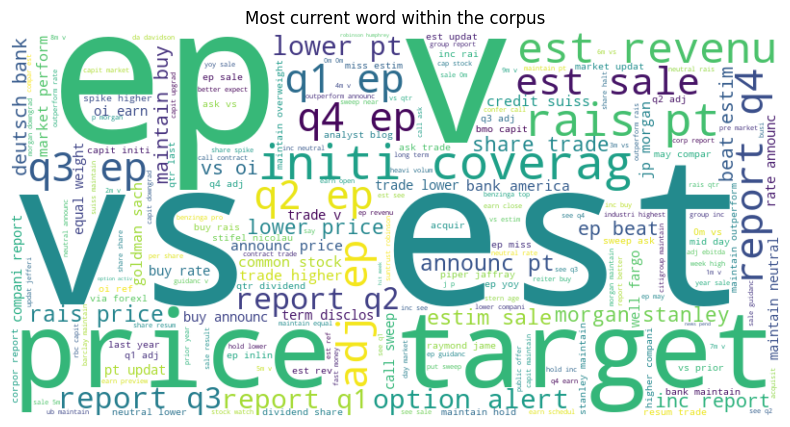

In [14]:
# Let's generate a wordcloud in order to see most current words after dropped stop words
word_cloud(df2['headline_new'], 'Most current word within the corpus')

In [16]:
df2.to_csv('../data/df3.csv')

In [ ]:
df2

### English words

In [6]:
eng_words = [i.lower() for i in words.words()]
lm = WordNetLemmatizer()
eng_words_lem = [lm.lemmatize(i)for i in eng_words]

### infos about entire corpus

In [18]:
full_doc = " ".join(df2['headline'].values)
print(len(full_doc), 'characters')

66365332

In [19]:
# preprocessing on the corpus
corpus = process_text1(full_doc)
display_tokens_info(corpus)

nb tokens 8702194, nb tokens unique 175662


In [20]:
# Values_counts
tmp = pd.Series(corpus).value_counts()
tmp

vs         160439
est        139766
eps        124036
reports    103641
sales       74606
            ...  
$145.29         1
$191.69         1
$191.10         1
$219.25         1
$186.58         1
Name: count, Length: 175662, dtype: int64

In [21]:
rare_tokens = tmp[tmp==1] # We considered as rare token those occured once in the corpus
rare_tokens = list(rare_tokens.index)
len(rare_tokens)

87247

In [22]:
# df2['headline_cleaned'] = df2['headline'].apply(lambda x: process_text2(text=x, eng_words=eng_words_lem))